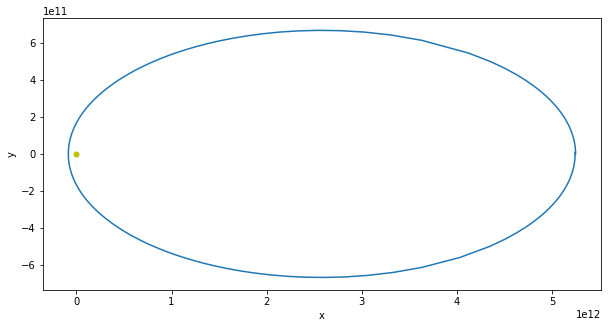

In [16]:
from numpy import zeros, sqrt, sum
from matplotlib.pyplot import style, figure, axes


def f(u,m_sun,G) :
    f = zeros(5)
    f[0] = u[2]
    f[1] = u[3]
    f[2] = - G*m_sun*u[0]/(u[0]**2 + u[1]**2)**(3/2)
    f[3] = - G*m_sun*u[1]/(u[0]**2 + u[1]**2)**(3/2)
    f[4] = 1
    f = f/sqrt(1 + f[0]**2 + f[1]**2 + f[2]**2 + f[3]**2)
    return f


t_0 = 0.; T = 75.3*365.25*24*60*60
x_0 = 5.24824*10**12; y_0 = 0.
v_x_0 = 0.; v_y_0 = 0.9*10**3
G = 6.674301515151515*10**(-11)
m_sun = 1.98847*10**30
dl = 2.*10**10
J = 10000
u = zeros((J,5))
u[0] = [x_0, y_0, v_x_0, v_y_0, t_0]
p = 3
eps = 0.001*sqrt(x_0**2 + y_0**2 + v_x_0**2 + v_y_0**2)
L = 2.5*x_0
j = 0


while u[j,4] < T :
    w_1 = f(u[j],m_sun,G)
    w_2 = f(u[j] + dl*1/2*w_1,m_sun,G)
    w_3 = f(u[j] + dl*3/4*w_2,m_sun,G)
    u_main = u[j] + dl*(2/9*w_1 + 1/3*w_2 + 4/9*w_3)
    u_embedded = u[j] + dl*w_2
    norm = sqrt(sum((u_main - u_embedded)**2))
    dl = dl*(eps*dl/L/norm)**(1/(p - 1))
    w_1 = f(u[j],m_sun,G)
    w_2 = f(u[j] + dl*1/2*w_1,m_sun,G)
    w_3 = f(u[j] + dl*3/4*w_2,m_sun,G)
    u[j + 1] = u[j] + dl*(2/9*w_1 + 1/3*w_2 + 4/9*w_3)
    j = j + 1
    
    
fig = figure(figsize=(10, 5))
xlabel('x')
ylabel('y')
plot(0,0,'yo',markersize=5)
plot(u[0:j+1,0],u[0:j+1,1])
plot(u[j,0],u[j,1])
